# Reading a dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [12]:
import pandas as pd
filepath = '/Users/joudsi/Desktop/data_angus_final.csv'
data = pd.read_csv("/Users/joudsi/Desktop/MyData0205.csv")

In [13]:
data.head()

,Unnamed: 0,admission_age,gender,dod,admission_type,curr_service,thirty_day_mort,hr,map,sbp,...,infection,explicit_sepsis,organ_dysfunction,mech_vent,angus,startdate,enddate,drug_name_generic,exclusion_bb_drug,exclusion_aki
0,1,72.2671,M,2108-08-30 00:00:00,EMERGENCY,MED,Y,54.0,89.0,12,...,1,0,0,1,1,2108-08-23 00:00:00,2108-08-30 00:00:00,NaN,0,0
1,2,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,1,1,1,0,1,2134-09-13 00:00:00,2134-09-15 00:00:00,NaN,0,0
2,3,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,1,1,1,0,1,2134-09-13 00:00:00,2134-09-16 00:00:00,NaN,0,0
3,4,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,1,1,1,0,1,2134-09-13 00:00:00,2134-09-16 00:00:00,NaN,0,0
4,5,87.8263,M,2135-02-08 00:00:00,EMERGENCY,MED,Y,79.0,78.0,12,...,1,1,1,0,1,2134-09-13 00:00:00,2134-09-16 00:00:00,NaN,0,0


In [14]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '838378')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838378 entries, 0 to 838377
Data columns (total 35 columns):
Unnamed: 0           838378 non-null int64
admission_age        838378 non-null float64
gender               838378 non-null object
dod                  593386 non-null object
admission_type       838378 non-null object
curr_service         838378 non-null object
thirty_day_mort      838378 non-null object
hr                   838378 non-null float64
map                  838378 non-null float64
sbp                  838378 non-null int64
temp                 838378 non-null int64
spo2                 838378 non-null float64
rr                   838378 non-null float64
cr                   838378 non-null int64
k                    838378 non-null float64
na                   838378 non-null float64
cl                   838378 non-null float64
bicarb               838378 non-null int64
hct                  838378 non-null float64
wbc                  838378 non-null float64
gluc

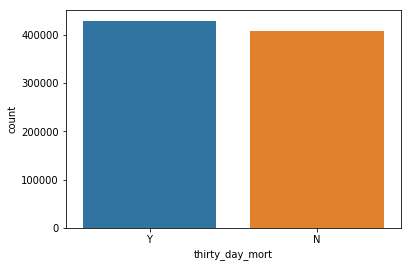

In [18]:
sns.countplot(x="thirty_day_mort", data=data)

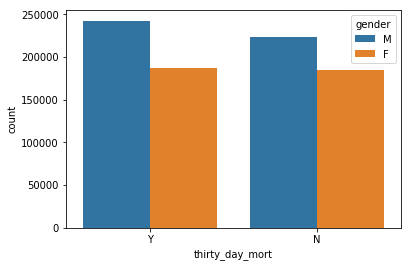

In [19]:
sns.countplot(x="thirty_day_mort", hue="gender",data=data)

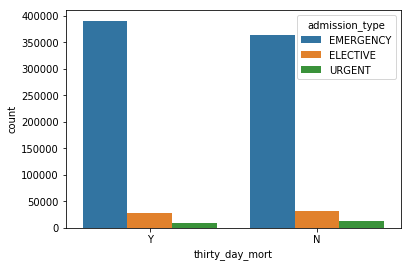

In [20]:
sns.countplot(x="thirty_day_mort", hue="admission_type",data=data)

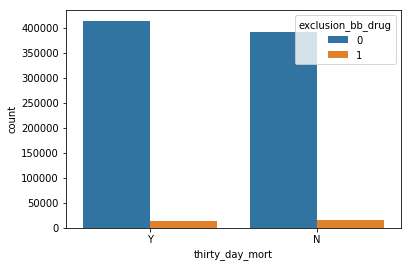

In [46]:
sns.countplot(x="thirty_day_mort", hue="exclusion_bb_drug",data=data)

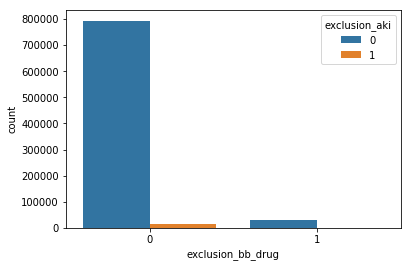

In [44]:
sns.countplot(x="exclusion_bb_drug", hue="exclusion_aki",data=data)

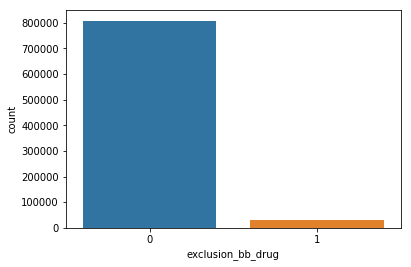

In [45]:
sns.countplot(x="exclusion_bb_drug", data=data)

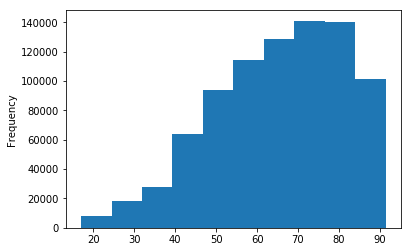

In [21]:
data["admission_age"].plot.hist()

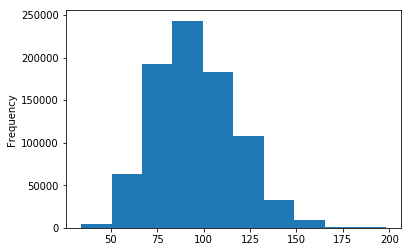

In [22]:
data["hr"].plot.hist()

In [25]:
data.drop(['gender', 'dod', 'admission_type', 'curr_service' , 'startdate', 'enddate', 'drug_name_generic' ] , axis=1, inplace=True)

In [26]:
X = data.drop("thirty_day_mort", axis=1)
Y = data["thirty_day_mort"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           N       0.65      0.62      0.64    122590\n           Y       0.66      0.68      0.67    128924\n\n   micro avg       0.65      0.65      0.65    251514\n   macro avg       0.65      0.65      0.65    251514\nweighted avg       0.65      0.65      0.65    251514\n'

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, predictions)

array([[76115, 46475],
       [40664, 88260]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, predictions)

0.6535421487471871